In [1]:
import xgboost
import pickle
import numpy as np
import pandas as pd
import plotly.express as px
from src.utils import ExecutePairTrading, run_simulation

In [2]:
transformed_data = pd.read_csv('../Data/data_pipeline_output_multi_entry_pnl_2020onwards_with_predicted_entry.csv')

In [ ]:
"""

"""
# with open('../Models/entry_model_multi_entry.pkl', 'rb') as file:
#     entry_model = pickle.load(file)
# pred_entry = entry_model.predict(transformed_data[entry_model.feature_names.values])
# # This table is avaiable to be loaded from DB
# transformed_data['entry_appears'] = pred_entry

In [ ]:
# transformed_data_2020_onwards = transformed_data[
#     transformed_data.Date >= '2020-01-01'
# ].reset_index(drop=True).to_csv('../Data/data_pipeline_output_multi_entry_pnl_2020onwards_with_predicted_entry.csv')

# User specifies the start and end date

e.g. user set timemachine to be on 2022-01-03, and want to see how well it does on 2022-12-31

In [9]:
"""
User Input
"""
starting_fund=10000
sim_start = '2020-01-01'
sim_end = '2023-12-31'

In [10]:
spy_prices = transformed_data[['Date', 'SPY_Close']].drop_duplicates().reset_index(drop=True)

In [11]:
result, all_execution_history = run_simulation(
    starting_fund=starting_fund,
    sim_start=sim_start,
    sim_end =sim_end,
    transformed_data = transformed_data,
    refresh_cadence = 60
)

In [12]:
spy_prices = spy_prices[
    (spy_prices.Date >= sim_start) & (spy_prices.Date <= sim_end)
]

In [13]:
result = pd.merge(spy_prices, result, how='left', on='Date')
result['spy_return'] = result.SPY_Close.apply(lambda x: starting_fund*(x/result.SPY_Close[0]))

# Plotting Overall PnLs

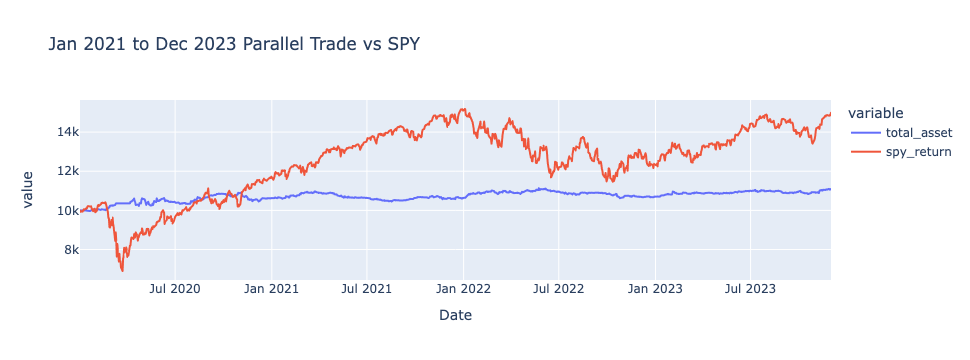

In [14]:
px.line(result, x="Date", y=['total_asset', 'spy_return'],title='Jan 2021 to Dec 2023 Parallel Trade vs SPY')

# Plot trade execution

this is kinda tricky - since there are lots of pairs. We need to be creative on how to plot these

In [17]:
# For the all execution history, it calculates pnl every day after entering a position
# But we only need to know when did we exit

all_execution_history_cleaned = \
all_execution_history[
    ['ticker1', 'ticker2', 'entry_dates','exit_dates']
].groupby(['ticker1', 'ticker2', 'entry_dates']).max().reset_index()

In [18]:
all_execution_history_cleaned

,ticker1,ticker2,entry_dates,exit_dates
0,ALL,GL,2020-04-03,2020-06-23
1,ALL,GL,2021-06-30,2021-08-31
2,ALL,GL,2021-09-21,2021-10-04
3,ANSS,LHX,2020-06-24,2020-09-17
4,ANSS,LHX,2020-12-22,2021-02-25
...,...,...,...,...
128,RVTY,STE,2020-11-09,2020-12-07
129,RVTY,STE,2021-03-12,2021-05-20
130,RVTY,STE,2021-06-07,2021-06-07
131,RVTY,STE,2023-09-11,2023-10-24
